In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

PATH = 'data/'

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [62]:
df=pd.read_pickle('df1.pkl')

In [85]:
df2=pd.read_pickle('df_7.pkl')

In [94]:
df2.head()

,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,atom_number
307,C,GLU,A,379,17.739,22.448,19.245,49.91,1.932199
308,O,GLU,A,379,18.690,22.852,19.921,48.38,-0.456180
309,CB,GLU,A,379,16.840,20.394,20.375,58.83,-2.317694
310,CG,GLU,A,379,18.044,20.300,21.314,67.23,1.811396
311,CD,GLU,A,379,17.859,21.078,22.620,71.93,-0.516582


In [ ]:
slen= len(df2['atom_name'])
e= pd.Series(np.random.randn(slen))

In [95]:
df2= df2.assign(atom_number=e.values)

In [96]:
df.head()

,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,atom_number
307,C,GLU,A,379,17.739,22.448,19.245,49.91,1.932199
308,O,GLU,A,379,18.690,22.852,19.921,48.38,-0.456180
309,CB,GLU,A,379,16.840,20.394,20.375,58.83,-2.317694
310,CG,GLU,A,379,18.044,20.300,21.314,67.23,1.811396
311,CD,GLU,A,379,17.859,21.078,22.620,71.93,-0.516582


In [97]:
from sklearn.utils import shuffle

In [98]:
df= shuffle(df)

In [99]:
cat_vars = ['atom_name', 'residue_name', 'chain_id',
       'residue_number']

In [100]:
contin_vars = ['x_coord', 'y_coord', 'z_coord']

In [101]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()

In [102]:
for v in contin_vars:
    df[v] = df[v].fillna(0).astype('float32')

In [103]:
train_cats(df)

In [104]:
df.columns

Index(['atom_name', 'residue_name', 'chain_id', 'residue_number', 'x_coord',
       'y_coord', 'z_coord', 'b_factor', 'atom_number'],
      dtype='object')

In [105]:
df=df.drop(['y_coord', 'z_coord', 'b_factor'],axis=1)
df.head()

,atom_name,residue_name,chain_id,residue_number,x_coord,atom_number
211,CG,ASN,A,65,21.056000,-0.441212
761,C,SER,A,163,22.532000,0.464787
750,CA,LYS,A,282,19.714001,1.944946
659,CA,PRO,A,85,22.061001,0.328705
422,CA,LYS,B,57,18.858000,-0.286021


In [106]:
# df=df.drop(['x_coord','y_coord', 'z_coord'],axis=1)
# df.head()

In [107]:
df1, y, nas, mapper = proc_df(df, 'x_coord', do_scale=True)

In [108]:
# y=y.values

In [109]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(len(df1) * train_ratio); train_size
val_idx = list(range(train_size, len(df1)))

In [110]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df1, y.astype(np.float32), cat_flds=cat_vars, bs=128)

In [111]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]

In [112]:
cat_sz

[('atom_name', 81),
 ('residue_name', 22),
 ('chain_id', 17),
 ('residue_number', 827)]

In [113]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [114]:
emb_szs

[(81, 41), (22, 11), (17, 9), (827, 50)]

In [115]:
m = md.get_learner(emb_szs, 1,
                   0.04, 1, [1000,500], [0.001,0.01])


In [116]:
m.lr_find()


 44%|████▍     | 114/257 [00:00<00:00, 146.83it/s, loss=120]


 65%|██████▍   | 166/257 [00:00<00:00, 172.70it/s, loss=294] 
                                                            

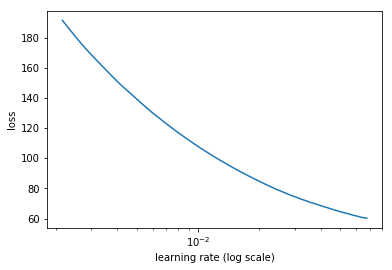

In [117]:
m.sched.plot(100)

In [118]:
lr = 5e-3

In [119]:
m.fit(lr, 10, cycle_len=4)


 44%|████▎     | 112/257 [00:00<00:01, 144.70it/s, loss=89]  


 88%|████████▊ | 227/257 [00:01<00:00, 186.92it/s, loss=16.1]


 99%|█████████▉| 254/257 [00:01<00:00, 202.07it/s, loss=14.7]
                                                             [ 0.      14.69631 10.02072]

 33%|███▎      | 86/257 [00:00<00:01, 144.58it/s, loss=9.77]


 86%|████████▋ | 222/257 [00:01<00:00, 211.83it/s, loss=8.75]


 98%|█████████▊| 252/257 [00:01<00:00, 220.69it/s, loss=8.77]
                                                             [1.      8.76931 8.21592]

 26%|██▌       | 67/257 [00:00<00:01, 132.00it/s, loss=7.69]


 79%|███████▉  | 204/257 [00:00<00:00, 211.88it/s, loss=7.42]


 90%|█████████ | 232/257 [00:01<00:00, 204.65it/s, loss=7.41]
                                                             [2.      7.40743 7.86264]

 24%|██▍       | 62/257 [00:00<00:01, 127.42it/s, loss=6.75]


 68%|██████▊   | 176/257 [00:00<00:00, 193.58it/s, loss=6.48]


 93%|█████████▎| 239/257 [00:01<00:00, 219.24it/s, loss=6.45]
                                                             [3.      6.44934 7.53936]

 24%|██▎       | 61/257 [00:00<00:01, 137.71it/s, loss=7.4] 


 73%|███████▎  | 188/257 [00:00<00:00, 201.84it/s, loss=8.09]


 93%|█████████▎| 239/257 [00:01<00:00, 200.62it/s, loss=8.08]
                                                             [4.      8.07787 7.98874]

 19%|█▊        | 48/257 [00:00<00:01, 111.67it/s, loss=7.3] 


 58%|█████▊    | 150/257 [00:00<00:00, 164.48it/s, loss=6.84]


 79%|███████▉  | 204/257 [00:01<00:00, 189.55it/s, loss=6.78]

 91%|█████████▏| 235/257 [00:01<00:00, 195.12it/s, loss=6.9] 
                                                            

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/bahram/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bahram/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bahram/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[5.      6.89515 7.04135]

 45%|████▍     | 115/257 [00:00<00:00, 177.06it/s, loss=6.02]


 89%|████████▉ | 230/257 [00:01<00:00, 212.43it/s, loss=5.76]


100%|██████████| 257/257 [00:01<00:00, 226.78it/s, loss=5.79]
                                                             [6.      5.78918 6.55757]

 33%|███▎      | 85/257 [00:00<00:01, 146.75it/s, loss=5.22]


 81%|████████  | 207/257 [00:00<00:00, 207.14it/s, loss=4.98]


 91%|█████████▏| 235/257 [00:01<00:00, 216.49it/s, loss=5.04]
                                                             [7.      5.04348 6.52743]

 28%|██▊       | 72/257 [00:00<00:01, 146.60it/s, loss=6.43]


 73%|███████▎  | 187/257 [00:00<00:00, 203.26it/s, loss=6.76]


 97%|█████████▋| 249/257 [00:01<00:00, 236.96it/s, loss=6.94]
                                                             [8.      6.94355 8.90517]

 25%|██▍       | 64/257 [00:00<00:01, 128.31it/s, loss=6.52]


 74%|███████▎  | 189/257 [00:00<00:00, 193.04it/s, loss=6.08]


 95%|█████████▌| 245/257 [00:01<00:00, 208.60it/s, loss=5.98]
                                                             [9.      5.97986 6.60428]

 26%|██▌       | 66/257 [00:00<00:01, 161.70it/s, loss=5.49]


 71%|███████   | 182/257 [00:00<00:00, 218.56it/s, loss=5.03]


 93%|█████████▎| 238/257 [00:01<00:00, 217.33it/s, loss=5.08]
                                                             [10.       5.08005  6.37537]

 14%|█▍        | 36/257 [00:00<00:02, 96.23it/s, loss=4.85]


 57%|█████▋    | 146/257 [00:00<00:00, 177.12it/s, loss=4.47]


 91%|█████████ | 234/257 [00:01<00:00, 209.22it/s, loss=4.4] 
                                                            [11.       4.39742  6.22634]

 11%|█▏        | 29/257 [00:00<00:02, 83.78it/s, loss=4.96]


 57%|█████▋    | 147/257 [00:00<00:00, 192.98it/s, loss=6.25]


 92%|█████████▏| 236/257 [00:01<00:00, 214.71it/s, loss=6.32]
                                                             [12.       6.31908  7.54756]

  5%|▌         | 13/257 [00:00<00:05, 43.16it/s, loss=6.09]


 48%|████▊     | 123/257 [00:00<00:00, 171.52it/s, loss=5.77]


 92%|█████████▏| 237/257 [00:01<00:00, 214.99it/s, loss=5.71]
                                                             [13.       5.70559  6.53207]

  2%|▏         | 6/257 [00:00<00:06, 36.33it/s, loss=5.53]


 45%|████▍     | 115/257 [00:00<00:00, 162.12it/s, loss=4.93]


 94%|█████████▍| 242/257 [00:01<00:00, 204.59it/s, loss=4.67]


 94%|█████████▍| 242/257 [00:01<00:00, 203.39it/s, loss=4.77]
                                                             [14.       4.7701   6.17791]

 35%|███▍      | 89/257 [00:00<00:01, 145.83it/s, loss=4.22]


 82%|████████▏ | 212/257 [00:01<00:00, 209.02it/s, loss=4.11]


 94%|█████████▍| 242/257 [00:01<00:00, 227.73it/s, loss=4.09]
                                                             [15.       4.08773  6.09358]

 36%|███▌      | 93/257 [00:00<00:00, 167.76it/s, loss=5.4]


 82%|████████▏ | 210/257 [00:00<00:00, 212.29it/s, loss=6.15]


 92%|█████████▏| 237/257 [00:01<00:00, 214.58it/s, loss=6.24]
                                                             [16.       6.24048  7.76001]

 24%|██▍       | 62/257 [00:00<00:01, 120.96it/s, loss=5.58]


 81%|████████  | 208/257 [00:00<00:00, 221.25it/s, loss=5.42]


 92%|█████████▏| 237/257 [00:01<00:00, 216.27it/s, loss=5.38]
                                                             [17.       5.3778   6.47932]

 24%|██▍       | 62/257 [00:00<00:01, 131.68it/s, loss=4.78]


 69%|██████▉   | 178/257 [00:00<00:00, 198.19it/s, loss=4.43]


 92%|█████████▏| 236/257 [00:01<00:00, 216.00it/s, loss=4.46]
                                                             [18.       4.45751  6.08512]

 15%|█▍        | 38/257 [00:00<00:02, 93.82it/s, loss=3.98]


 71%|███████   | 182/257 [00:00<00:00, 215.56it/s, loss=3.91]


 93%|█████████▎| 240/257 [00:01<00:00, 221.27it/s, loss=3.9] 
                                                            [19.       3.9012   6.09123]

 15%|█▍        | 38/257 [00:00<00:02, 105.85it/s, loss=4.76]


 62%|██████▏   | 160/257 [00:00<00:00, 206.13it/s, loss=5.43]


 96%|█████████▌| 246/257 [00:01<00:00, 230.74it/s, loss=5.97]
                                                             [20.       5.97357  6.83359]

 12%|█▏        | 30/257 [00:00<00:02, 86.22it/s, loss=5.54]


 52%|█████▏    | 134/257 [00:00<00:00, 165.73it/s, loss=5.15]


 96%|█████████▋| 248/257 [00:01<00:00, 213.03it/s, loss=4.94]
                                                             [21.       4.93868  6.30717]

  7%|▋         | 18/257 [00:00<00:03, 67.25it/s, loss=4.66]


 50%|████▉     | 128/257 [00:00<00:00, 184.82it/s, loss=4.36]


 96%|█████████▌| 247/257 [00:01<00:00, 233.14it/s, loss=4.28]
                                                             [22.       4.2828   6.11058]

  2%|▏         | 6/257 [00:00<00:06, 41.07it/s, loss=4.19]


 40%|████      | 104/257 [00:00<00:01, 145.97it/s, loss=3.74]


 89%|████████▊ | 228/257 [00:01<00:00, 205.34it/s, loss=3.76]


100%|██████████| 257/257 [00:01<00:00, 229.59it/s, loss=3.78]
                                                             [23.       3.78445  6.07226]

 46%|████▌     | 118/257 [00:00<00:00, 193.05it/s, loss=5.31]


 91%|█████████▏| 235/257 [00:01<00:00, 226.98it/s, loss=5.74]


 91%|█████████▏| 235/257 [00:01<00:00, 215.33it/s, loss=5.73]
                                                             [24.       5.73208  7.01733]

 36%|███▌      | 92/257 [00:00<00:00, 166.10it/s, loss=5.14]


 80%|███████▉  | 205/257 [00:00<00:00, 206.71it/s, loss=4.8] 


 91%|█████████ | 234/257 [00:01<00:00, 213.29it/s, loss=4.72]
                                                             [25.       4.72336  6.39707]

 31%|███       | 79/257 [00:00<00:01, 140.76it/s, loss=4.16]


 76%|███████▌  | 195/257 [00:00<00:00, 198.79it/s, loss=4.14]


 98%|█████████▊| 253/257 [00:01<00:00, 221.26it/s, loss=4.04]
                                                             [26.       4.044    6.07414]

 25%|██▍       | 64/257 [00:00<00:01, 137.92it/s, loss=3.61]


 70%|██████▉   | 179/257 [00:00<00:00, 200.54it/s, loss=3.61]


 92%|█████████▏| 237/257 [00:01<00:00, 211.87it/s, loss=3.53]
                                                             [27.      3.5301  6.062 ]

 19%|█▉        | 50/257 [00:00<00:01, 104.60it/s, loss=4.49]


 62%|██████▏   | 159/257 [00:00<00:00, 171.40it/s, loss=5.4] 


 94%|█████████▍| 241/257 [00:01<00:00, 200.02it/s, loss=5.42]
                                                             [28.       5.42295  8.30069]

 14%|█▍        | 37/257 [00:00<00:02, 81.61it/s, loss=4.84]


 55%|█████▌    | 142/257 [00:00<00:00, 153.33it/s, loss=4.71]


 98%|█████████▊| 251/257 [00:01<00:00, 199.30it/s, loss=4.66]
                                                             [29.       4.66013  6.26387]

 12%|█▏        | 30/257 [00:00<00:02, 92.64it/s, loss=4.23]


 57%|█████▋    | 146/257 [00:00<00:00, 195.17it/s, loss=3.96]


 98%|█████████▊| 253/257 [00:01<00:00, 220.60it/s, loss=3.89]
                                                             [30.       3.89237  6.15078]

  7%|▋         | 17/257 [00:00<00:02, 82.74it/s, loss=3.73]


 46%|████▌     | 118/257 [00:00<00:00, 170.93it/s, loss=3.41]


 90%|█████████ | 232/257 [00:01<00:00, 206.68it/s, loss=3.39]
                                                             [31.       3.39368  6.098  ]

  0%|          | 0/257 [00:00<?, ?it/s, loss=3.42]


 38%|███▊      | 98/257 [00:00<00:01, 158.07it/s, loss=4.69]


 94%|█████████▍| 242/257 [00:01<00:00, 229.40it/s, loss=5.37]


 94%|█████████▍| 242/257 [00:01<00:00, 223.58it/s, loss=5.45]
                                                             [32.       5.44674  6.88477]

 43%|████▎     | 111/257 [00:00<00:00, 176.30it/s, loss=4.65]


 86%|████████▌ | 221/257 [00:01<00:00, 205.37it/s, loss=4.54]


 97%|█████████▋| 250/257 [00:01<00:00, 216.46it/s, loss=4.48]
                                                             [33.       4.48281  6.43617]

 39%|███▊      | 99/257 [00:00<00:00, 192.13it/s, loss=3.77]


 81%|████████  | 208/257 [00:00<00:00, 215.60it/s, loss=3.75]


 93%|█████████▎| 238/257 [00:01<00:00, 217.71it/s, loss=3.79]
                                                             [34.       3.78562  6.15362]

 26%|██▌       | 66/257 [00:00<00:01, 139.03it/s, loss=3.34]


 74%|███████▎  | 189/257 [00:00<00:00, 213.75it/s, loss=3.31]


 96%|█████████▌| 247/257 [00:01<00:00, 232.58it/s, loss=3.22]
                                                             [35.       3.21954  6.22972]

 21%|██        | 54/257 [00:00<00:01, 112.93it/s, loss=4.14]


 73%|███████▎  | 187/257 [00:00<00:00, 197.43it/s, loss=4.94]


 95%|█████████▍| 244/257 [00:01<00:00, 207.43it/s, loss=4.81]
                                                             [36.       4.80546  7.62406]

 14%|█▍        | 37/257 [00:00<00:02, 98.12it/s, loss=4.54]


 62%|██████▏   | 159/257 [00:00<00:00, 200.32it/s, loss=4.41]


 93%|█████████▎| 238/257 [00:01<00:00, 215.92it/s, loss=4.35]
                                                             [37.       4.35464  6.33048]

 10%|▉         | 25/257 [00:00<00:03, 65.17it/s, loss=3.9]


 60%|█████▉    | 153/257 [00:00<00:00, 177.19it/s, loss=3.64]


 93%|█████████▎| 239/257 [00:01<00:00, 201.07it/s, loss=3.69]
                                                             [38.       3.69411  6.23028]

  9%|▉         | 23/257 [00:00<00:03, 65.92it/s, loss=3.43]


 55%|█████▌    | 142/257 [00:00<00:00, 165.44it/s, loss=3.2] 


 97%|█████████▋| 249/257 [00:01<00:00, 196.02it/s, loss=3.16]
                                                             [39.       3.15803  6.28148]



In [120]:
x,y = m.predict_with_targs()

In [133]:
import matplotlib.pyplot as plt 
# from matplotlib import style
# style.use('ggplot')

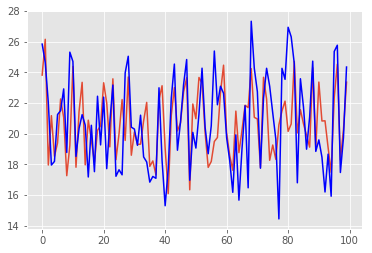

In [137]:
plt.plot(x[:100])
plt.plot(y[:100],'b')
plt.show()